# Trabajo práctico integrador

**Nombre**: FS

## Primera Parte (Clase 1 y 2)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Primer ejercicio


In [2]:
#Function to calculate norm of vector with p >= 1
def vector_norm(vector_x,p):

    x_p=0
    for j in range(len(vector_x)):
        x_p += pow(abs(vector_x[j]), p)
        x_final = pow(x_p, 1/p)
    return  x_final

#Infinity norm
def norm_vector(vector_x, type):
    if type == "infinity":
        return abs(np.max(vector_x))
    elif type == "zero":    
        return np.count_nonzero(vector_x)
    raise ValueError ("Argumento no permitido") 

x_vector = np.random.random(10)
print(x_vector)
l = 5

vector_norm(x_vector, l)
#zero norm of vector
type = "zero"
norm_vector(x_vector, type )

#Infinite norm of vector
type = "infinity"
norm_vector(x_vector, type)

[0.78953879 0.3221095  0.62064315 0.99408874 0.23351372 0.21360605
 0.09386835 0.61755399 0.45914609 0.80566761]


0.9940887387094394

### Segundo Ejercicio

In [3]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

In [4]:
true_positive_rate = np.sum((truth)&(prediction))
print(f'La tasa de verdaderos positivos es', true_positive_rate)

La tasa de verdaderos positivos es 3


In [5]:
true_negative_rate = np.sum((truth == 0)&(prediction == 0))
print(f'La tasa de verdaderos negativos es', true_negative_rate)

La tasa de verdaderos negativos es 1


In [6]:
false_positive_rate = np.sum((truth==1)&(prediction==1))
print(f'La tasa de falsos negativos es:', false_positive_rate)

La tasa de falsos negativos es: 3


In [7]:
false_negative_rate = np.sum((truth==1)&(prediction==0))
print(f'La tasa de falsos negativos es:', false_negative_rate)

La tasa de falsos negativos es: 3


In [8]:
#Calculo de la precisión
precision = (true_positive_rate) / (true_positive_rate + false_positive_rate)
print(f'La precision calculada es:', precision)

La precision calculada es: 0.5


In [9]:
#Calculo de recall
recall =  (true_positive_rate) / (true_positive_rate + false_negative_rate)
print(f'El valor de recall calculado es:', recall)

El valor de recall calculado es: 0.5


In [10]:
#Calculo de accuracy
accuracy = (true_positive_rate + true_negative_rate) / (true_positive_rate + true_negative_rate + false_positive_rate + false_negative_rate)
print(f'El valor de la accuracy calculada es:', accuracy)

El valor de la accuracy calculada es: 0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

<h3>Ejercicio 3 <h3>

<h4>Load data<h4>

In [11]:
PATH_DATASET = "./data/UCIHAR/train/"
print(os.path.abspath("."))

/home/benjas/Documents/gitrepo/IIA


In [12]:
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

<h4>EDA<h4>

In [13]:
print("Estructura features del dataset: {}".format(X_train.shape))
X_train.view(dtype='float64')

Estructura features del dataset: (7352, 561)


array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.77913261,
         0.24914484,  0.04081119],
       [ 0.28965416, -0.01884304, -0.15828059, ..., -0.78518142,
         0.24643223,  0.02533948],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.78326693,
         0.24680852,  0.03669484]])

In [14]:
print("Estructura de las etiquetas: {}".format(y_train.shape))
y_train.view(dtype='int64')

Estructura de las etiquetas: (7352,)


array([5, 5, 5, ..., 2, 2, 2])

In [15]:
data = pd.DataFrame(data=X_train)
display(data)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [16]:
#Summaring data
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [17]:
#Check for NaN  under an entire Dataframe
data_NaN =data.isnull().sum().sum()
data_NaN

0

In [18]:
# Number of unique class
clases = np.unique(y_train)
clases

array([1, 2, 3, 4, 5, 6])

<h4>Scaling data<h4>

In [19]:
# Standarization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

<h3>PCA Aplication<h3>

In [20]:
RANDOM_STATE=17
pca = PCA(n_components=0.8, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

----------------------------------------------------
Percentage explained variance for each component
----------------------------------------------------
[0.50781172 0.0658068  0.02806437 0.02503953 0.01888285 0.01724006
 0.01371011 0.01199078 0.0099586  0.00965087 0.00860052 0.00800281
 0.00763996 0.00645329 0.00632324 0.00599722 0.0058675  0.00575407
 0.00567921 0.00527296 0.00500363 0.00488408 0.00478206 0.00468563
 0.00449289 0.00421027]


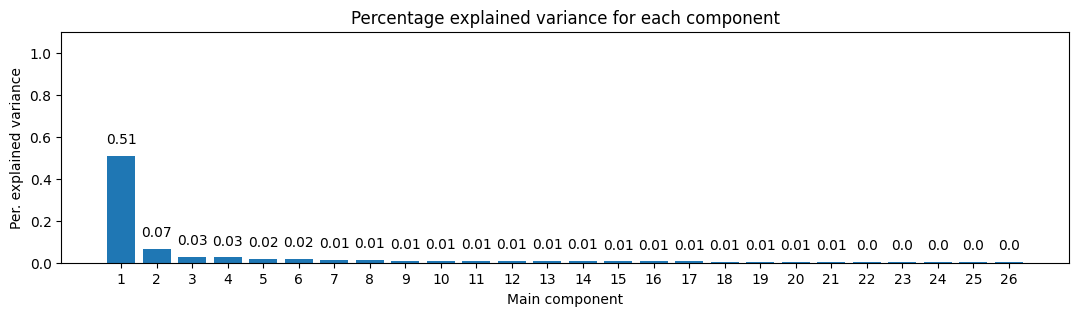

In [21]:
#Based in https://www.cienciadedatos.net/documentos/py19-pca-python.html
# Percentage explained variance for each component
# ==============================================================================
print('----------------------------------------------------')
print('Percentage explained variance for each component')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 3))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,9),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentage explained variance for each component')
ax.set_xlabel('Main component')
ax.set_ylabel('Per. explained variance');

In [22]:
exp_var_pca, noise_var = pca.explained_variance_ratio_, pca.noise_variance_

In [23]:
cum_sum_values = np.cumsum(exp_var_pca)

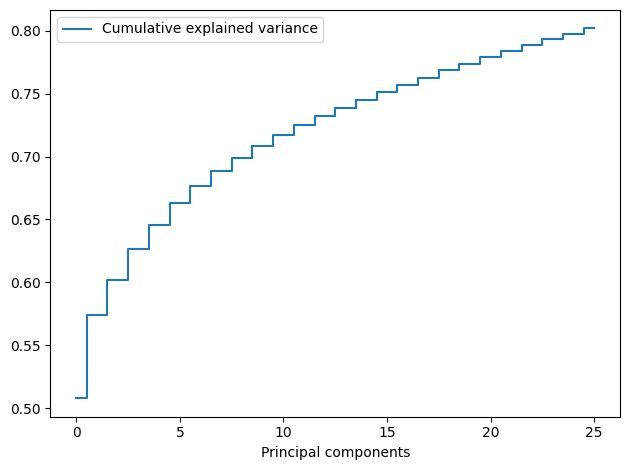

In [24]:
#Create the visualization plot
#Based in https://vitalflux.com/pca-explained-variance-concept-python-example/
plt.step(range(0,len(cum_sum_values)), cum_sum_values, where='mid',label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [25]:
# Cantidad de componentes necesarios
X_pca.shape[1]

26

/tmp/ipykernel_41289/2394860141.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


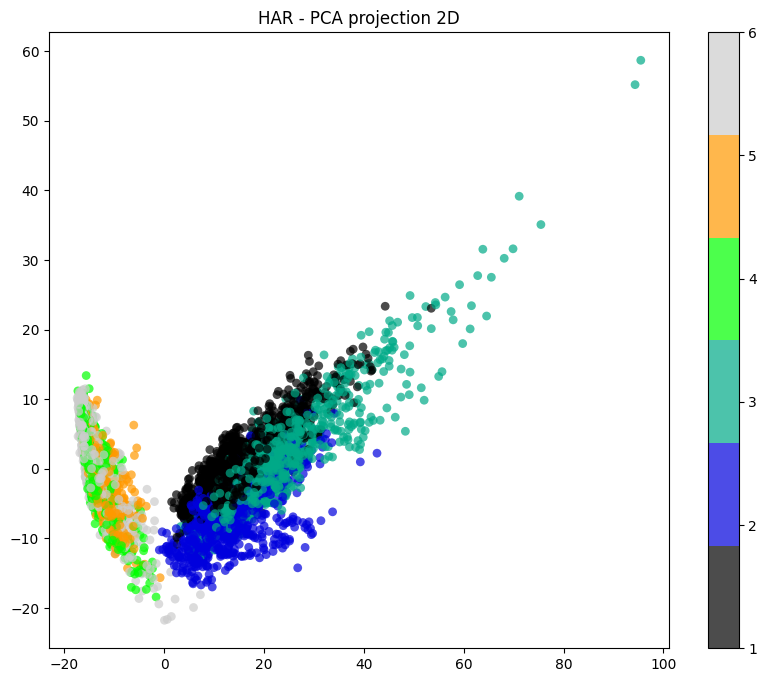

In [26]:
# Showing the two main components
plt.figure(figsize=(10,8))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()

plt.title('HAR - PCA projection 2D');

<h4>K-means<h4>

In [27]:
# Cluster numbers = 6
n_clases_6 = 6
kmeans = KMeans(n_clusters=n_clases_6, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

In [28]:
# Cluster numbers = 2
n_clases = 2
kmeans2 = KMeans(n_clusters=n_clases, n_init=100, random_state=RANDOM_STATE)
kmeans2.fit(X_pca)
cluster_labels_2 = kmeans.labels_

In [29]:
# Cheking the inertia 
inertia = []
for k in range(1, n_clases_6):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=RANDOM_STATE).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

NameError: name 'X_pca_minst' is not defined

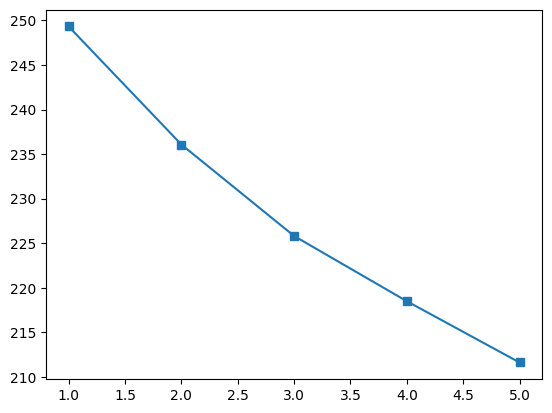

In [ ]:
plt.plot(range(1, n_clases_6), inertia, marker='s')
plt.show()

<h3> Ejercicio 4 <h3>

<h4>Load data <h4>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

n_clases = 10
digits = load_digits(n_class = n_clases)
X = digits.data
y = digits.target

In [ ]:
X_train_minst, X_test_minst, y_train_minst, y_test_minst = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Normalization
X_train_minst = X_train_minst/255
X_test_minst = X_test_minst/255

In [ ]:
# Number of unique class
clases = np.unique(y_train_minst)
clases

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Standarization
scaler = StandardScaler()
X_scaled_minst = scaler.fit_transform(X_train_minst)

In [ ]:
cum_sum_values_minst = np.cumsum(exp_var_pca)

<h4>PCA APLICATION<h4>

In [ ]:
RANDOM_STATE=17
pca = PCA(n_components=0.8, random_state=RANDOM_STATE).fit(X_scaled_minst)
X_pca_minst = pca.transform(X_scaled_minst)

In [ ]:
exp_var_pca, noise_var = pca.explained_variance_ratio_, pca.noise_variance_

In [ ]:
# Cantidad de componentes necesarios
X_pca_minst.shape[1]
X_pca_minst

array([[ 0.158822  ,  0.13008809,  2.05083954, ...,  0.19384408,
        -0.71056616, -0.94289502],
       [ 1.06496645,  3.54094052, -1.11566692, ..., -0.39813336,
         0.17045441, -1.13322349],
       [-1.60053217, -4.15197884, -4.84268069, ..., -0.0575629 ,
         0.124236  , -0.14998686],
       ...,
       [-1.63729675,  2.26052812, -0.54275447, ..., -0.94153137,
        -0.30861825,  0.72901283],
       [ 1.68589846,  1.80446546, -0.28150265, ..., -0.07392228,
        -0.10864035,  0.28110037],
       [ 0.32684191, -0.44308513, -4.46997411, ..., -0.07769202,
         0.5250317 ,  0.48116468]])

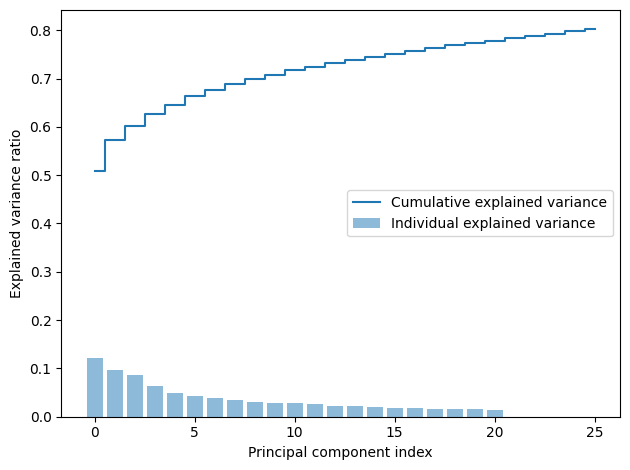

In [ ]:
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_values_minst)), cum_sum_values_minst, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/tmp/ipykernel_39844/3808901678.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca_minst[:, 0], X_pca_minst[:, 1], c = y_train_minst, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


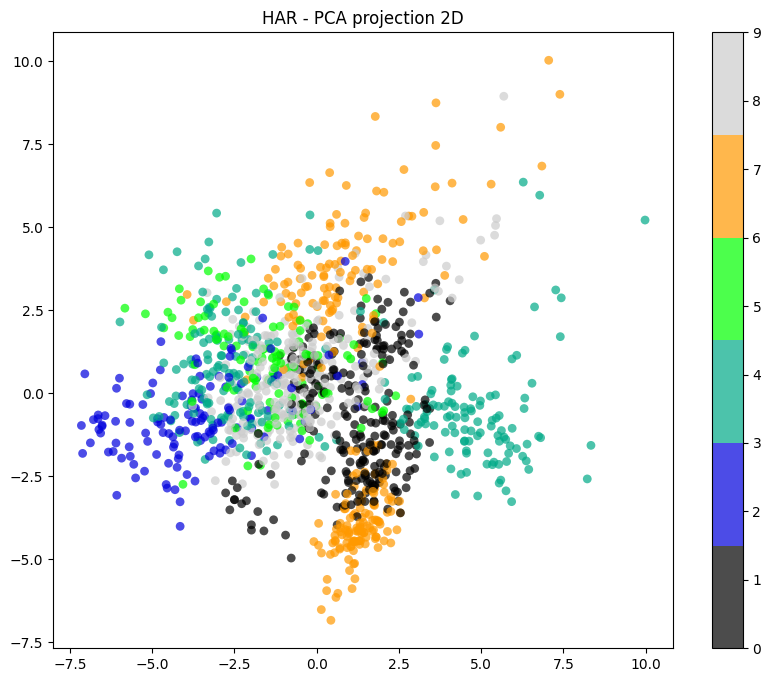

In [ ]:
# Showing the two main components
plt.figure(figsize=(10,8))

plt.scatter(X_pca_minst[:, 0], X_pca_minst[:, 1], c = y_train_minst, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()

plt.title('HAR - PCA projection 2D');

<h4>K means <h4>

In [ ]:
n_clases_10 = 10
kmeans = KMeans(n_clusters=n_clases_10, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca_minst)
cluster_labels = kmeans.labels_

In [ ]:
n_clases = 2
kmeans = KMeans(n_clusters=n_clases, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca_minst)
cluster_labels = kmeans.labels_

In [ ]:
# Cheking the inertia 
inertia = []
for k in range(1, n_clases_10):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=RANDOM_STATE).fit(X_pca_minst)
    inertia.append(np.sqrt(kmeans.inertia_))

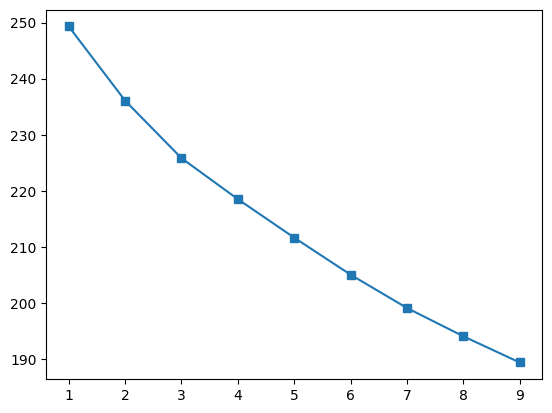

In [ ]:
plt.plot(range(1, n_clases_10), inertia, marker='s')
plt.show()

## Segunda Parte (Clase 3 y 4)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

In [ ]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [ ]:
import pandas as pd
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


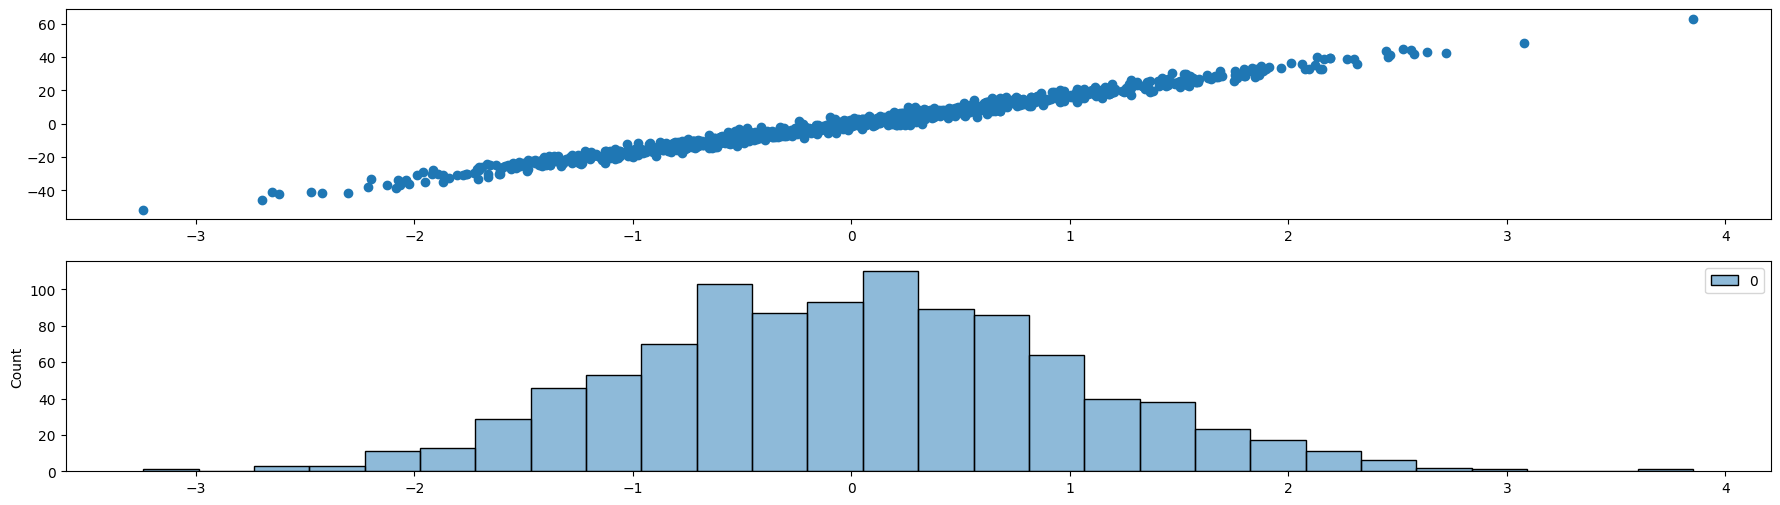

In [ ]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [ ]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [ ]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

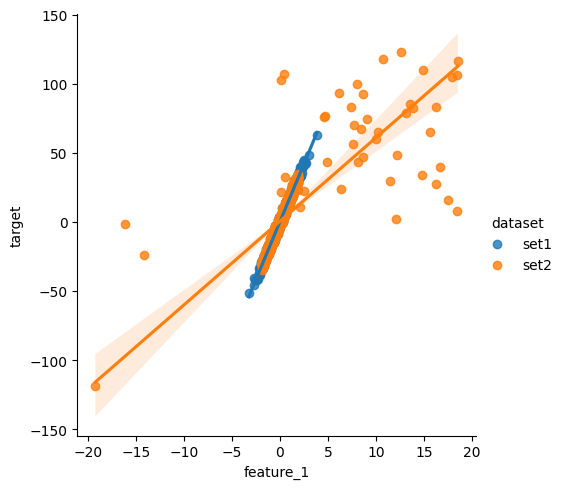

In [ ]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [ ]:
import pandas as pd
#Generacion de datasets
df_generado = pd.DataFrame(np.random.randint(0,25, size=(25,5)), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Target'])
df_generado
df_generado.shape

(25, 5)

In [ ]:
def split(df: pd.DataFrame):
    df_shuffled = df.sample(frac=1)
    #sp => Split factor
    sf_train = 0.7
    sf_test = 0.9

    X = df_shuffled[0:len(df_shuffled), :df_shuffled.shape[1]-1]
    Y = df_shuffled[0:len(df_shuffled), df_shuffled.shape[1]-1:]
    #Divide features and target
    X_train, X_test, X_val = X[0:int(sf_train*len(X))], X[int(sf_train*len(X)):int(sf_test*len(X))], X[int(sf_test*len(X)):]  
    Y_train, Y_test, Y_val = Y[0:int(sf_train*len(Y))], Y[int(sf_train*len(Y)):int(sf_test*len(Y))], Y[int(sf_test*len(Y)):]  

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:


1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [ ]:
# Creamos un dataset de prueba
## Utilicen mas `n_features` > 1 y n_informative mas o menos la mitad de n_features
#Poco noise y pocos outliers
X_1, y_1 = make_regression(n_samples = 100,
                       n_features = 10,
                       noise = 20,
                       n_informative = 5,
                       random_state = 42)


new_data = np.append(X_1,y_1.reshape(-1,1),axis=1)

df1 = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df1.columns:
    if i ==  len(df1.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
       
    i += 1
   
df1.columns = new_col

df1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-0.926930,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044,-273.778317
1,0.202923,0.334457,0.285865,1.547505,-0.387702,1.795878,2.010205,-1.515744,-0.612789,0.658544,207.175658
2,-0.241236,0.456753,0.342725,-1.251539,1.117296,1.443765,0.447709,0.352055,-0.082151,0.569767,80.483366
3,0.289775,-1.008086,-2.038125,0.871125,-0.408075,-0.326024,-0.351513,2.075401,1.201214,-1.870792,70.243255
4,-0.007973,-0.190339,-1.037246,0.077368,0.538910,-0.861284,-1.382800,1.479944,1.523124,-0.875618,-36.779252


In [ ]:
df1_outlier = generate_outliers(df1,['feature_1'], percentage = 0.1, extreme_outlier = False, two_tailed= True)

In [ ]:
#Mucho noise y pocos outliers
X_2, y_2 = make_regression(n_samples = 100,
                       n_features = 10,
                       noise = 200,
                       n_informative = 5,
                       random_state = 42)


new_data_two= np.append(X_2,y_2.reshape(-1,1),axis=1)

df2 = pd.DataFrame(new_data_two)

new_col = []
i = 0
for col in df2.columns:
    if i ==  len(df2.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
       
    i += 1
   
df2.columns = new_col

df2.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-0.926930,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044,-77.390018
1,0.202923,0.334457,0.285865,1.547505,-0.387702,1.795878,2.010205,-1.515744,-0.612789,0.658544,172.976668
2,-0.241236,0.456753,0.342725,-1.251539,1.117296,1.443765,0.447709,0.352055,-0.082151,0.569767,609.278879
3,0.289775,-1.008086,-2.038125,0.871125,-0.408075,-0.326024,-0.351513,2.075401,1.201214,-1.870792,137.613665
4,-0.007973,-0.190339,-1.037246,0.077368,0.538910,-0.861284,-1.382800,1.479944,1.523124,-0.875618,-45.855365


In [ ]:
poco_outlier = 0.01
df2_outlier= generate_outliers(df2,['feature_1'], percentage = poco_outlier, extreme_outlier = False, two_tailed= True)

In [ ]:
#Poco noise y muchos outliers
X_3, y_3 = make_regression(n_samples = 100,
                       n_features = 10,
                       noise = 200,
                       n_informative = 5,
                       random_state = 42)


new_data_two= np.append(X_3,y_3.reshape(-1,1),axis=1)

df3 = pd.DataFrame(new_data_two)

new_col = []
i = 0
for col in df3.columns:
    if i ==  len(df3.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
       
    i += 1
   
df3.columns = new_col

df3.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-0.926930,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044,-77.390018
1,0.202923,0.334457,0.285865,1.547505,-0.387702,1.795878,2.010205,-1.515744,-0.612789,0.658544,172.976668
2,-0.241236,0.456753,0.342725,-1.251539,1.117296,1.443765,0.447709,0.352055,-0.082151,0.569767,609.278879
3,0.289775,-1.008086,-2.038125,0.871125,-0.408075,-0.326024,-0.351513,2.075401,1.201214,-1.870792,137.613665
4,-0.007973,-0.190339,-1.037246,0.077368,0.538910,-0.861284,-1.382800,1.479944,1.523124,-0.875618,-45.855365


In [ ]:
#Outliers
muchos_outliers = 0.6
df3_outlier= generate_outliers(df3,['feature_1'], percentage = muchos_outliers, extreme_outlier = False, two_tailed= True)

In [ ]:
#Mucho noise y muchos outliers
X_4, y_4 = make_regression(n_samples = 100,
                       n_features = 10,
                       noise = 200,
                       n_informative = 5,
                       random_state = 42)


new_data_two= np.append(X_4,y_4.reshape(-1,1),axis=1)

df4 = pd.DataFrame(new_data_two)

new_col = []
i = 0
for col in df4.columns:
    if i ==  len(df4.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
       
    i += 1
   
df4.columns = new_col


df4.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-0.926930,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044,-77.390018
1,0.202923,0.334457,0.285865,1.547505,-0.387702,1.795878,2.010205,-1.515744,-0.612789,0.658544,172.976668
2,-0.241236,0.456753,0.342725,-1.251539,1.117296,1.443765,0.447709,0.352055,-0.082151,0.569767,609.278879
3,0.289775,-1.008086,-2.038125,0.871125,-0.408075,-0.326024,-0.351513,2.075401,1.201214,-1.870792,137.613665
4,-0.007973,-0.190339,-1.037246,0.077368,0.538910,-0.861284,-1.382800,1.479944,1.523124,-0.875618,-45.855365


In [ ]:
df4_outlier= generate_outliers(df4,['feature_1'], percentage = muchos_outliers, extreme_outlier = False, two_tailed= True)

In [ ]:
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNet
from sklearn.metrics import r2_score

#Comparar con distintos niveles y outliers de la regresión

#Split the data into training(0.8) /testing sets (0.2)
X_1_train= df1_outlier.iloc[:80,:-2] 
X_1_test = df1_outlier.iloc[80:,:-2]

#Split the targets into train/testing sets
y_1_train = df1_outlier.iloc[:80, -1]
y_1_test = df1_outlier.iloc[80:, -1]

#Create linear regression objet
linear_regression = LinearRegression()

#Train the model using the training sets
linear_regression.fit(X_1_train, y_1_train)

#Make predictions using the testing test
y1_pred_lr = linear_regression.predict(X_1_test)

#The mean squared error
y1_lr_mse = mean_squared_error(y_1_test, y1_pred_lr)
y1_lr_r2_score = r2_score(y_1_test, y1_pred_lr)
metric1_lr=[y1_lr_mse, y1_lr_r2_score]

#Create Hubert regressor object
huber = HuberRegressor()
huber.fit(X_1_train, y_1_train)

#Make predictios using the testing test
y1_pred_hb = huber.predict(X_1_test)
print("Huber coefficients", huber.coef_)

#Metrics for Huber regressor
y1_hb_mse = mean_squared_error(y_1_test, y1_pred_hb)
y1_hb_r2_score = r2_score(y_1_test, y1_pred_hb)
metric1_hb = [y1_hb_mse, y1_hb_r2_score]

#Create Elastinet regressor objet
alpha = 0.1
enet = ElasticNet(alpha = alpha, l1_ratio = 0.7)
enet.fit(X_1_train, y_1_train)
y1_pred_enet = enet.predict(X_1_test)

#Metrics for elastic net
y1_enet_mse = mean_squared_error(y_1_test, y1_pred_enet)
y1_enet_r2_score = r2_score(y_1_test, y1_pred_enet)
metric1_enet = [y1_enet_mse, y1_enet_r2_score]


Huber coefficients [ 1.37391929e+01  2.49003447e-02 -2.89465827e+00  6.24898595e+01
  4.77538693e+00  6.96123058e+01  1.35064657e+00  8.82448044e+00
  2.64308261e+00]


In [ ]:

#Split the data into training(0.8) /testing sets (0.2)
X_2_train= df2_outlier.iloc[:80,:-2] 
X_2_test = df2_outlier.iloc[80:,:-2]

#Split the targets into train/testing sets
y_2_train = df2_outlier.iloc[:80, -1]
y_2_test = df2_outlier.iloc[80:, -1]

#Create linear regression objet
linear_regression_2 = LinearRegression()

#Train the model using the training sets
linear_regression_2.fit(X_2_train, y_2_train)

#Make predictions using the testing test
y2_pred = linear_regression.predict(X_2_test)

#Metrics for linear regression
y2_lr_mse = mean_squared_error(y_2_test, y2_pred)
y2_lr_r2_score = r2_score(y_2_test, y2_pred)
metric2_lr = [y2_lr_mse, y2_lr_r2_score]

#Create Hubert regressor object
huber_2 = HuberRegressor()
huber_2.fit(X_2_train, y_2_train)

#Make predictios using the testing test
y2_pred_hb = huber.predict(X_2_test)
print("Huber coefficients", huber.coef_)

#Metrics for Hubber regressor
y2_hb_mse = mean_squared_error(y_2_test, y2_pred_hb)
y2_hb_r2_score = r2_score(y_2_test, y2_pred_hb)
metric2_hb = [y2_hb_mse, y2_hb_r2_score]

#Create Elastinet regressor objet
alpha = 0.1
enet = ElasticNet(alpha = alpha, l1_ratio = 0.7)
enet.fit(X_2_train, y_2_train)
y2_pred_enet = enet.predict(X_2_test)

#Metrics for elastic net
y2_enet_mse = mean_squared_error(y_2_test, y2_pred_enet)
y2_r2_score_enet = r2_score(y_2_test, y2_pred_enet)
metric2_enet = [y2_enet_mse, y2_r2_score_enet]


Huber coefficients [ 1.37391929e+01  2.49003447e-02 -2.89465827e+00  6.24898595e+01
  4.77538693e+00  6.96123058e+01  1.35064657e+00  8.82448044e+00
  2.64308261e+00]


In [ ]:

#Split the data into training(0.8) /testing sets (0.2)
X_3_train= df3_outlier.iloc[:80,:-2] 
X_3_test = df3_outlier.iloc[80:,:-2]

#Split the targets into train/testing sets
y_3_train = df3_outlier.iloc[:80, -1]
y_3_test = df3_outlier .iloc[80:, -1]

#Create linear regression objet
linear_regression_3 = LinearRegression()

#Train the model using the training sets
linear_regression_3.fit(X_3_train, y_3_train)

#Make predictions using the testing test
y3_pred = linear_regression.predict(X_3_test)

#Metrics for linear regression
y3_lr_mse = mean_squared_error(y_3_test, y3_pred)
y3_lr_r2_score = r2_score(y_3_test, y3_pred)
metric3_lr = [y3_lr_mse, y3_lr_r2_score]

#Create Hubert regressor object
huber_3 = HuberRegressor()
huber_3.fit(X_3_train, y_3_train)

#Make predictios using the testing test
y3_pred_hb = huber.predict(X_3_test)
print("Huber coefficients", huber.coef_)

#Metrics for Huber regressor
y3_hb_mse = mean_squared_error(y_3_test, y3_pred_hb)
y3_hb_r2_score = r2_score(y_3_test, y3_pred_hb)
metric3_hb = [y3_hb_mse, y3_hb_r2_score]

#Create Elastinet regressor objet
alpha = 0.1
enet_3 = ElasticNet(alpha = alpha, l1_ratio = 0.7)
enet_3.fit(X_3_train, y_3_train)

y3_pred_enet = enet_3.predict(X_3_test)

#Metrics for elastic net regressor
y3_enet_mse = mean_squared_error(y_3_test, y3_pred_enet)
y3_enet_r2_score = r2_score(y_3_test, y3_pred_enet)
metric3_enet  = [y3_enet_mse, y3_enet_r2_score]

Huber coefficients [ 1.37391929e+01  2.49003447e-02 -2.89465827e+00  6.24898595e+01
  4.77538693e+00  6.96123058e+01  1.35064657e+00  8.82448044e+00
  2.64308261e+00]


In [ ]:

#Split the data into training(0.8) /testing sets (0.2)
X_4_train= df4_outlier.iloc[:80,:-2] 
X_4_test = df4_outlier.iloc[80:,:-2]

#Split the targets into train/testing sets
y_4_train = df4_outlier.iloc[:80, -1]
y_4_test = df4_outlier.iloc[80:, -1]

#Create linear regression objet
linear_regression_4 = LinearRegression()

#Train the model using the training sets
linear_regression_4.fit(X_4_train, y_4_train)

#Make predictions using the testing test
y4_pred = linear_regression.predict(X_4_test)

#The mean squared error
y4_lr_mse = mean_squared_error(y_4_test, y4_pred)
y4_lr_r2_score = r2_score(y_4_test, y4_pred)
metric4_lr = [y4_lr_mse, y4_lr_r2_score]

#Create Hubert regressor object
huber_4 = HuberRegressor()
huber_4.fit(X_4_train, y_4_train)

#Make predictios using the testing test
y4_pred_hb = huber.predict(X_4_test)
print("Huber coefficients", huber.coef_)

#Metrics for Hubbert regresor
y4_hb_mse = mean_squared_error(y_4_test, y4_pred_hb)
y4_hb_r2_score = r2_score(y_4_test, y4_pred_hb)
metric4_hb = [y4_hb_mse, y4_hb_r2_score]

#Create Elastinet regressor objet
alpha = 0.1
enet_4 = ElasticNet(alpha = alpha, l1_ratio = 0.7)
enet_4.fit(X_4_train, y_4_train)

y4_pred_enet = enet_4.predict(X_4_test)

#Metrics for elastic net regressor
y4_enet_mse = mean_squared_error(y_4_test, y4_pred_enet)
y4_r2_score_enet = r2_score(y_4_test, y4_pred_enet)
metric4_enet = [y4_enet_mse, y4_r2_score_enet]

Huber coefficients [ 1.37391929e+01  2.49003447e-02 -2.89465827e+00  6.24898595e+01
  4.77538693e+00  6.96123058e+01  1.35064657e+00  8.82448044e+00
  2.64308261e+00]


<h1> Metrics <h1>

<h3> Linear regression <h3>

In [ ]:
print("Medición del mse y r2 score para los diferentes datasets en la regresión lineal:")
metric1_lr, metric2_lr, metric3_lr, metric4_lr

Medición del mse y r2 score para los diferentes datasets en la regresión lineal:


([1053.8621089491883, 0.8689448407107736],
 [45369.400750004206, 0.15801289255643836],
 [46910.465716549406, 0.1294130695013832],
 [45710.37548481772, 0.15168491982744126])

<h3> Hubert <h3>

In [ ]:
print("Medición del mse y r2 score para los diferentes datasets empleando el regresor de Hubbert:")
metric1_hb, metric2_hb, metric3_hb, metric4_hb


Medición del mse y r2 score para los diferentes datasets empleando el regresor de Hubbert:


([1090.3515974390687, 0.8644071163862963],
 [45613.285615122106, 0.153486760213157],
 [47233.177672359, 0.12342402618765702],
 [45974.01230965766, 0.14679222113861046])

<h3> Elastic Net <h3>

In [ ]:
print("Medición del mse y r2 score para los diferentes datasets empleando el regresor de Elastic Net:")
metric1_enet, metric2_enet, metric3_enet, metric4_enet

Medición del mse y r2 score para los diferentes datasets empleando el regresor de Elastic Net:


([1086.5483427632937, 0.8648800778326929],
 [49746.343037542465, 0.07678349751904845],
 [54443.87282163807, -0.010395514097944814],
 [49821.68149027134, 0.07538533036577266])

<h2> Ploteo de los datasets<h2>

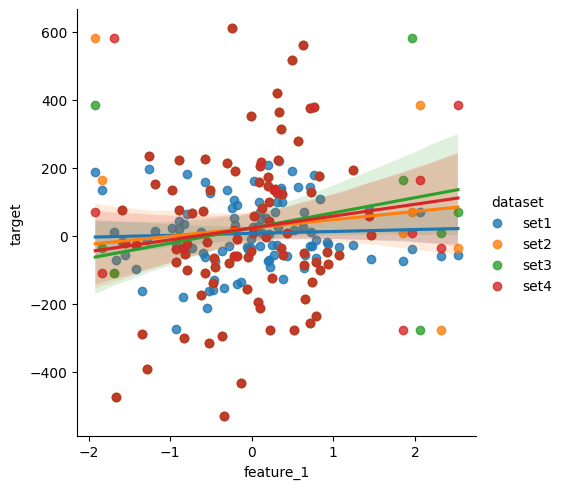

In [ ]:
sns.lmplot(data = pd.concat([df1_outlier.assign(dataset = 'set1'),
                                 df2_outlier.assign(dataset = 'set2'), df3_outlier.assign(dataset= "set3"), df4_outlier.assign(dataset="set4")]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`